# Chapter 10 : Groupby Operations: Split–Apply–Combine

In [1]:
import pandas as pd



In [2]:
#mean/describe, agg(), transfor(), filter()
df = pd.read_csv('data/gapminder.tsv', sep='\t')


df.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


<AxesSubplot:xlabel='year'>

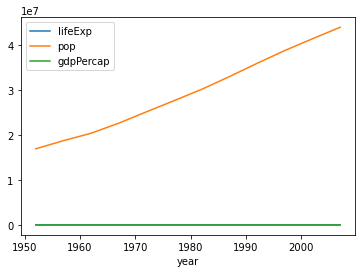

In [3]:
df.groupby('year').mean().plot()

AxesSubplot(0.125,0.125;0.775x0.755)


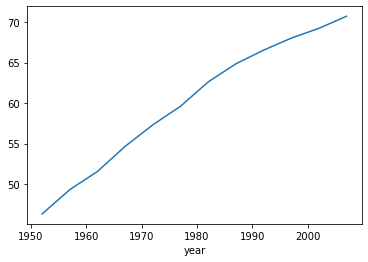

In [4]:

# calculate the average life expectancy for each year

avg_life_exp_by_year = df[df['continent']=='Asia'].groupby('year').lifeExp.mean().plot()

print(avg_life_exp_by_year)

In [5]:
df[df['continent']=='Asia']

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1675,"Yemen, Rep.",Asia,1987,52.922,11219340,1971.741538
1676,"Yemen, Rep.",Asia,1992,55.599,13367997,1879.496673
1677,"Yemen, Rep.",Asia,1997,58.020,15826497,2117.484526
1678,"Yemen, Rep.",Asia,2002,60.308,18701257,2234.820827


In [6]:


avg_life_exp_by_year = df.groupby('continent').lifeExp.mean()

print(avg_life_exp_by_year)

continent
Africa      48.865330
Americas    64.658737
Asia        60.064903
Europe      71.903686
Oceania     74.326208
Name: lifeExp, dtype: float64


In [7]:
years = df.year.unique()

print(years)

[1952 1957 1962 1967 1972 1977 1982 1987 1992 1997 2002 2007]


In [8]:

avg_life_exp_by_year = df.groupby('continent').lifeExp.describe()
avg_life_exp_by_year

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
Africa,624.0,48.865330,9.150210,23.599,42.37250,47.7920,54.41150,76.442
Americas,300.0,64.658737,9.345088,37.579,58.41000,67.0480,71.69950,80.653
Asia,396.0,60.064903,11.864532,28.801,51.42625,61.7915,69.50525,82.603
Europe,360.0,71.903686,5.433178,43.585,69.57000,72.2410,75.45050,81.757
Oceania,24.0,74.326208,3.795611,69.120,71.20500,73.6650,77.55250,81.235


In [9]:
def my_mean(values):

    """My version of calculating a mean

    """

    # get the total number of numbers for the denominator

    n = len(values)



    # start the sum at 0

    sum = 0

    for value in values:

        # add each value to the running sum

        sum += value



    # return the summed values divided by the number of values
    return(sum / n)

In [10]:
agg_my_mean = df.groupby('year').lifeExp.agg(my_mean)

print(agg_my_mean)

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64


In [11]:
import numpy as np
cont_le_agg = df.groupby('continent').lifeExp.agg(np.mean)

print(cont_le_agg)

continent
Africa      48.865330
Americas    64.658737
Asia        60.064903
Europe      71.903686
Oceania     74.326208
Name: lifeExp, dtype: float64


In [12]:
def my_mean_diff(values, diff_value):

    """Difference between the mean and diff_value

    """

    n = len(values)

    sum = 0

    for value in values:

        sum += value

    mean = sum / n

    return(mean - diff_value)

In [13]:
global_mean = df.lifeExp.mean()

print(global_mean)

59.47443936619714


In [14]:
agg_mean_diff = df.groupby('year').lifeExp.agg(my_mean_diff, diff_value=global_mean)

print(agg_mean_diff)

year
1952   -10.416820
1957    -7.967038
1962    -5.865190
1967    -3.796150
1972    -1.827053
1977     0.095718
1982     2.058758
1987     3.738173
1992     4.685899
1997     5.540237
2002     6.220483
2007     7.532983
Name: lifeExp, dtype: float64


In [15]:
gdf = df.groupby('year').lifeExp.agg([np.count_nonzero, np.mean, np.std])

print(gdf)

      count_nonzero       mean        std
year                                     
1952            142  49.057620  12.225956
1957            142  51.507401  12.231286
1962            142  53.609249  12.097245
1967            142  55.678290  11.718858
1972            142  57.647386  11.381953
1977            142  59.570157  11.227229
1982            142  61.533197  10.770618
1987            142  63.212613  10.556285
1992            142  64.160338  11.227380
1997            142  65.014676  11.559439
2002            142  65.694923  12.279823
2007            142  67.007423  12.073021


In [16]:
gdf_dict = df.groupby('year').agg({

    'lifeExp': 'mean',

    'pop': 'median',

    'gdpPercap': 'median'

})

print(gdf_dict)

        lifeExp         pop    gdpPercap
year                                    
1952  49.057620   3943953.0  1968.528344
1957  51.507401   4282942.0  2173.220291
1962  53.609249   4686039.5  2335.439533
1967  55.678290   5170175.5  2678.334740
1972  57.647386   5877996.5  3339.129407
1977  59.570157   6404036.5  3798.609244
1982  61.533197   7007320.0  4216.228428
1987  63.212613   7774861.5  4280.300366
1992  64.160338   8688686.5  4386.085502
1997  65.014676   9735063.5  4781.825478
2002  65.694923  10372918.5  5319.804524
2007  67.007423  10517531.0  6124.371108


In [17]:
gdf = df.groupby('year')['lifeExp'].agg([np.count_nonzero,

         np.mean,

         np.std,]).rename(columns={'count_nonzero': 'count',

                    'mean': 'avg',

                    'std': 'std_dev'}).reset_index()  # return a flat dataframe

print(gdf)

    year  count        avg    std_dev
0   1952    142  49.057620  12.225956
1   1957    142  51.507401  12.231286
2   1962    142  53.609249  12.097245
3   1967    142  55.678290  11.718858
4   1972    142  57.647386  11.381953
5   1977    142  59.570157  11.227229
6   1982    142  61.533197  10.770618
7   1987    142  63.212613  10.556285
8   1992    142  64.160338  11.227380
9   1997    142  65.014676  11.559439
10  2002    142  65.694923  12.279823
11  2007    142  67.007423  12.073021


In [18]:
def my_zscore(x):

    '''Calculates the z-score of provided data

    'x' is a vector or series of values.

    '''

    return((x - x.mean()) / x.std())

In [19]:
transform_z = df.groupby('year').lifeExp.transform(my_zscore)

In [20]:
transform_z

0      -1.656854
1      -1.731249
2      -1.786543
3      -1.848157
4      -1.894173
          ...   
1699   -0.081621
1700   -0.336974
1701   -1.574962
1702   -2.093346
1703   -1.948180
Name: lifeExp, Length: 1704, dtype: float64

In [21]:
from scipy.stats import zscore

In [22]:
# calculate a grouped zscore

sp_z_grouped = df.groupby('year').lifeExp.transform(zscore)

In [23]:
sp_z_nogroup = zscore(df.lifeExp)

In [24]:
print(transform_z.head())

0   -1.656854
1   -1.731249
2   -1.786543
3   -1.848157
4   -1.894173
Name: lifeExp, dtype: float64


In [25]:
print(sp_z_grouped.head())

0   -1.662719
1   -1.737377
2   -1.792867
3   -1.854699
4   -1.900878
Name: lifeExp, dtype: float64


In [26]:
print(sp_z_nogroup[:5])

0   -2.375334
1   -2.256774
2   -2.127837
3   -1.971178
4   -1.811033
Name: lifeExp, dtype: float64


In [27]:
import seaborn as sns

import numpy as np

In [28]:
np.random.seed(42)

In [29]:
tips_10 = sns.load_dataset('tips').sample(10)

In [30]:

tips_10.loc[np.random.permutation(tips_10.index)[:4],'total_bill'] = np.NaN

In [31]:
tips_10

,total_bill,tip,sex,smoker,day,time,size
24,19.82,3.18,Male,No,Sat,Dinner,2
6,8.77,2.00,Male,No,Sun,Dinner,2
153,NaN,2.00,Male,No,Sun,Dinner,4
211,NaN,5.16,Male,Yes,Sat,Dinner,4
198,NaN,2.00,Female,Yes,Thur,Lunch,2
176,NaN,2.00,Male,Yes,Sun,Dinner,2
192,28.44,2.56,Male,Yes,Thur,Lunch,2
124,12.48,2.52,Female,No,Thur,Lunch,2
9,14.78,3.23,Male,No,Sun,Dinner,2
101,15.38,3.00,Female,Yes,Fri,Dinner,2


In [32]:
def fill_na_mean(x):

    '''Returns the average of a given vector

    '''

    avg = x.mean()

    return(x.fillna(avg))


In [33]:
total_bill_group_mean = tips_10.groupby('sex').total_bill.transform(fill_na_mean)

# assign to a new column in the original data
# you can also replace the original column by using 'total_bill'

tips_10['fill_total_bill'] = total_bill_group_mean

print(tips_10)

     total_bill   tip     sex smoker   day    time  size  fill_total_bill
24        19.82  3.18    Male     No   Sat  Dinner     2          19.8200
6          8.77  2.00    Male     No   Sun  Dinner     2           8.7700
153         NaN  2.00    Male     No   Sun  Dinner     4          17.9525
211         NaN  5.16    Male    Yes   Sat  Dinner     4          17.9525
198         NaN  2.00  Female    Yes  Thur   Lunch     2          13.9300
176         NaN  2.00    Male    Yes   Sun  Dinner     2          17.9525
192       28.44  2.56    Male    Yes  Thur   Lunch     2          28.4400
124       12.48  2.52  Female     No  Thur   Lunch     2          12.4800
9         14.78  3.23    Male     No   Sun  Dinner     2          14.7800
101       15.38  3.00  Female    Yes   Fri  Dinner     2          15.3800


In [34]:
tips = sns.load_dataset('tips')

In [35]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [36]:
# note the number of rows in the original data
print(tips.shape)

(244, 7)


In [52]:
# look at the frequency counts for the table size
print(tips['size'].value_counts())

2    156
3     38
4     37
Name: size, dtype: int64


In [38]:
# lambda x: x['size'].count() >= 30

def filer_criteria(x):

    if x['size'].count()>=30:
        return True
    else:
        return False
    

In [39]:

tips_filtered = tips.groupby('size').filter(filer_criteria)

In [40]:
tips_filtered

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [42]:
print(tips['day'].value_counts())

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64


In [43]:
tips.shape

(244, 7)

In [44]:
def filer_criteria_day(X):
    if X['day'].count()>20:
        return True
    else:
        return False
    

In [60]:
tipe_day_filer = tips.groupby('day').filter(lambda X:X['day'].count()>30)

In [61]:
tipe_day_filer.shape

(225, 7)

In [63]:
print(tipe_day_filer['day'].value_counts())

Sat     87
Sun     76
Thur    62
Fri      0
Name: day, dtype: int64


In [68]:
tipe_day_filer.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [69]:
tips_10 = sns.load_dataset('tips').sample(10, random_state=42)
print(tips_10)

     total_bill   tip     sex smoker   day    time  size
24        19.82  3.18    Male     No   Sat  Dinner     2
6          8.77  2.00    Male     No   Sun  Dinner     2
153       24.55  2.00    Male     No   Sun  Dinner     4
211       25.89  5.16    Male    Yes   Sat  Dinner     4
198       13.00  2.00  Female    Yes  Thur   Lunch     2
176       17.89  2.00    Male    Yes   Sun  Dinner     2
192       28.44  2.56    Male    Yes  Thur   Lunch     2
124       12.48  2.52  Female     No  Thur   Lunch     2
9         14.78  3.23    Male     No   Sun  Dinner     2
101       15.38  3.00  Female    Yes   Fri  Dinner     2


In [70]:
grouped = tips_10.groupby('sex')

In [71]:
print(grouped)

In [72]:
print(grouped.groups)

{'Male': [24, 6, 153, 211, 176, 192, 9], 'Female': [198, 124, 101]}


In [73]:
female = grouped.get_group('Female')
print(female)

     total_bill   tip     sex smoker   day    time  size
198       13.00  2.00  Female    Yes  Thur   Lunch     2
124       12.48  2.52  Female     No  Thur   Lunch     2
101       15.38  3.00  Female    Yes   Fri  Dinner     2


In [76]:
bill_sex_time = tips_10.groupby(['sex', 'time'])


group_avg = bill_sex_time.mean()
print(group_avg)

               total_bill       tip      size
sex    time                                  
Male   Lunch    28.440000  2.560000  2.000000
       Dinner   18.616667  2.928333  2.666667
Female Lunch    12.740000  2.260000  2.000000
       Dinner   15.380000  3.000000  2.000000


In [77]:
print(type(group_avg))

<class 'pandas.core.frame.DataFrame'>


In [78]:
print(group_avg.columns)

Index(['total_bill', 'tip', 'size'], dtype='object')


In [79]:
print(group_avg.index)

MultiIndex([(  'Male',  'Lunch'),
            (  'Male', 'Dinner'),
            ('Female',  'Lunch'),
            ('Female', 'Dinner')],
           names=['sex', 'time'])


In [80]:
print(tips.index)

RangeIndex(start=0, stop=244, step=1)


In [81]:
group_method = tips_10.groupby(['sex', 'time']).mean().reset_index()
print(group_method)

      sex    time  total_bill       tip      size
0    Male   Lunch   28.440000  2.560000  2.000000
1    Male  Dinner   18.616667  2.928333  2.666667
2  Female   Lunch   12.740000  2.260000  2.000000
3  Female  Dinner   15.380000  3.000000  2.000000


In [82]:
group_param = tips_10.groupby(['sex', 'time'], as_index=False).mean()
print(group_param)

      sex    time  total_bill       tip      size
0    Male   Lunch   28.440000  2.560000  2.000000
1    Male  Dinner   18.616667  2.928333  2.666667
2  Female   Lunch   12.740000  2.260000  2.000000
3  Female  Dinner   15.380000  3.000000  2.000000


In [88]:
intv_df = pd.read_csv('data/epi_sim.txt')


# the number of rows is over 9 million!

print(intv_df.head())

   ig_type  intervened        pid  rep  sid        tr
0        3          40  294524448    1  201  0.000135
1        3          40  294571037    1  201  0.000135
2        3          40  290699504    1  201  0.000135
3        3          40  288354895    1  201  0.000135
4        3          40  292271290    1  201  0.000135


In [93]:
intv_df.rep.value_counts()

1    3510746
2    3509134
0    2414773
Name: rep, dtype: int64

In [95]:
count_only = intv_df.groupby(['rep','intervened', 'tr'])['ig_type'].count()

print(count_only.head(n=10))

rep
0    2414773
1    3510746
2    3509134
Name: ig_type, dtype: int64


In [96]:
import seaborn as sns

import matplotlib.pyplot as plt

In [98]:
count_mean = intv_df.groupby(['rep','intervened', 'tr'])['ig_type'].count().groupby(level=[0, 1, 2]).mean()

In [102]:
count_mean.reset_index()

,rep,intervened,tr,ig_type
0,0,8,0.000166,1.0
1,0,9,0.000152,3.0
2,0,9,0.000166,1.0
3,0,10,0.000152,1.0
4,0,10,0.000166,1.0
...,...,...,...,...
1191,2,193,0.000135,1.0
1192,2,193,0.000152,1.0
1193,2,195,0.000135,1.0
1194,2,198,0.000166,1.0


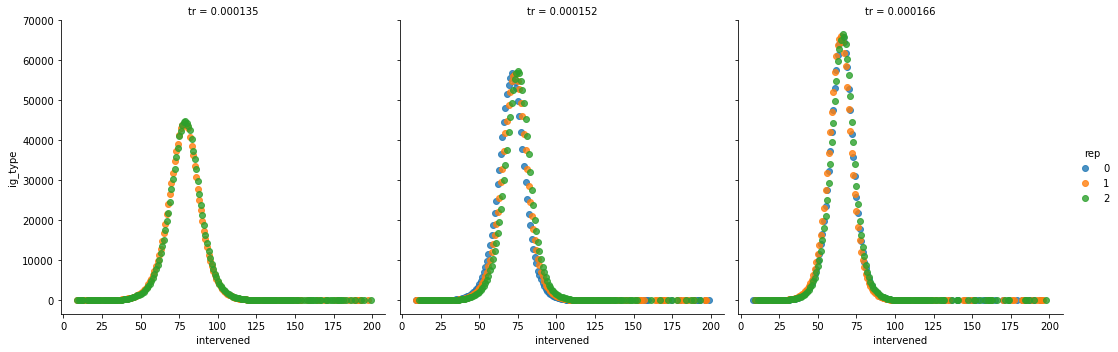

In [99]:
fig = sns.lmplot(x='intervened', y='ig_type', hue='rep', col='tr',fit_reg=False, data=count_mean.reset_index())

plt.show()

In [103]:
cumulative_count = intv_df.groupby(['rep','intervened', 'tr'])['ig_type'].count().groupby(level=['rep']).cumsum().reset_index()


In [104]:
cumulative_count

,rep,intervened,tr,ig_type
0,0,8,0.000166,1
1,0,9,0.000152,4
2,0,9,0.000166,5
3,0,10,0.000152,6
4,0,10,0.000166,7
...,...,...,...,...
1191,2,193,0.000135,3509130
1192,2,193,0.000152,3509131
1193,2,195,0.000135,3509132
1194,2,198,0.000166,3509133


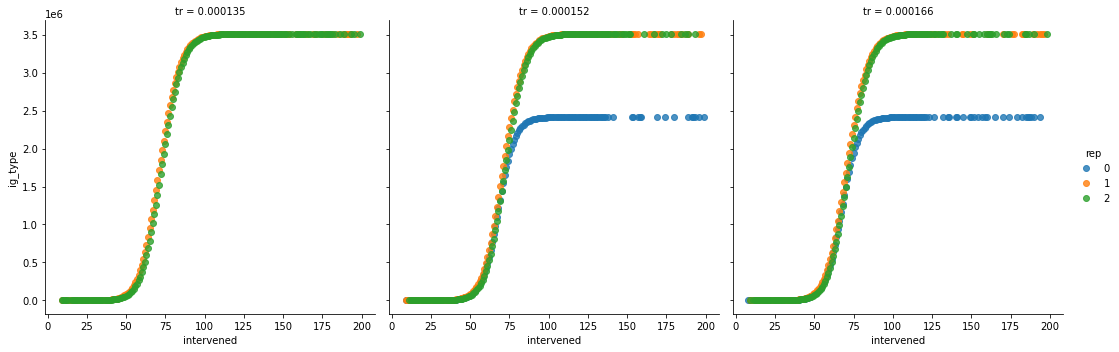

In [105]:
fig = sns.lmplot(x='intervened', y='ig_type', hue='rep', col='tr',

                 fit_reg=False, data=cumulative_count)

plt.show()